In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.externals import joblib #jbolib模块
warnings.simplefilter('ignore')

/home/foresight/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#讀取資料
df_train_raw = pd.read_csv('train.csv').set_index('txkey');
df_test_raw = pd.read_csv('test.csv').set_index('txkey');

df_train_y = df_train_raw['fraud_ind'];
df_train_x = df_train_raw.drop(['fraud_ind'], axis=1);

print('Train:{} ,test:{}'.format(df_train_x.shape[0],df_test_raw.shape[0]))

df_total = df_train_x.append(df_test_raw, ignore_index=False)
#df_total = pd.concat([df_train_x,df_test_raw])

df_total.head()

Train:1521787 ,test:421665


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd
txkey,,,,,,,,,,,,,,,,,,,,,
516056,6881,113261,38038,513.80,5,0,N,0,N,N,...,N,0,33,172652.0,457,59333,N,0,102,0
4376,0,134508,45725,465.62,5,0,N,2,N,N,...,N,0,9,105114.0,451,0,N,5817,102,0
483434,6881,15408,188328,513.80,5,0,N,0,N,N,...,N,0,6,152458.0,457,59333,N,0,102,0
1407164,6716,157159,29967,1016.11,5,62,N,5,N,N,...,N,0,5,172946.0,247,50436,N,3281,102,0
1051004,5975,105985,81305,713.66,5,62,N,4,N,N,...,N,0,6,182129.0,263,93775,N,5817,102,0


### 資料型別與數據判斷

In [3]:
df_show = df_total
#查看資料
print('資料筆數:{} ,欄位個數:{}'.format(df_show.shape[0],df_show.shape[1]))
print(df_show.head())
print('------------------------------資料型態------------------------------')
print(df_show.info())    #查看資料型態
print('------------------------------統計數據------------------------------')
print('--------------數字型態--------------')
print(df_show.describe())  #查看數值型狀況
print('--------------category型態--------------')
print(df_show.describe(include=['O']))  #查看Object狀況
print('--------------是否有遺漏值--------------')
#print(df_total.isnull().sum())   #查看缺值狀況
total = df_show.isna().sum(axis = 0).sort_values(ascending = False)
percent = df_show.isna().sum(axis = 0).sort_values(ascending = False)/df_total.shape[0]

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(35)

資料筆數:1943452 ,欄位個數:21
         acqic   bacno    cano    conam  contp  csmcu ecfg  etymd flbmk  \
txkey                                                                     
516056    6881  113261   38038   513.80      5      0    N      0     N   
4376         0  134508   45725   465.62      5      0    N      2     N   
483434    6881   15408  188328   513.80      5      0    N      0     N   
1407164   6716  157159   29967  1016.11      5     62    N      5     N   
1051004   5975  105985   81305   713.66      5     62    N      4     N   

        flg_3dsmk  ...  insfg iterm  locdt     loctm  mcc  mchno  ovrlt scity  \
txkey              ...                                                          
516056          N  ...      N     0     33  172652.0  457  59333      N     0   
4376            N  ...      N     0      9  105114.0  451      0      N  5817   
483434          N  ...      N     0      6  152458.0  457  59333      N     0   
1407164         N  ...      N     0      5  172

,Total,Percent
flg_3dsmk,16296,0.008385
flbmk,16296,0.008385
stscd,0,0.000000
bacno,0,0.000000
cano,0,0.000000
conam,0,0.000000
contp,0,0.000000
csmcu,0,0.000000
ecfg,0,0.000000
etymd,0,0.000000


In [4]:
# Missing Data 處理 (把Raw為空值得拿掉)
df_total['flbmk'] = df_total['flbmk'].fillna(df_total['flbmk'].mode()[0])
df_total['flg_3dsmk'] = df_total['flg_3dsmk'].fillna(df_total['flg_3dsmk'].mode()[0])
'''
total = df_total.isna().sum(axis = 0).sort_values(ascending = False)
percent = df_total.isna().sum(axis = 0).sort_values(ascending = False)/df_total.shape[0]

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(35)
'''

"\ntotal = df_total.isna().sum(axis = 0).sort_values(ascending = False)\npercent = df_total.isna().sum(axis = 0).sort_values(ascending = False)/df_total.shape[0]\n\nmissing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])\nmissing_data.head(35)\n"

In [5]:
#取得欄位中數值型態的欄位名稱 與 非數值型態的欄位名稱
categorical_features = []
number_features=[]
for dtype, feature in zip(df_total.dtypes, df_total.columns):
    if dtype == object:
        categorical_features.append(feature)
    else:
        number_features.append(feature)
        
number_features = df_total.select_dtypes(include= np.number).columns
categorical_features = df_total.select_dtypes(include= 'object').columns


In [6]:
### 查看資料長相

In [7]:
categorical_features

Index(['ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt'], dtype='object')

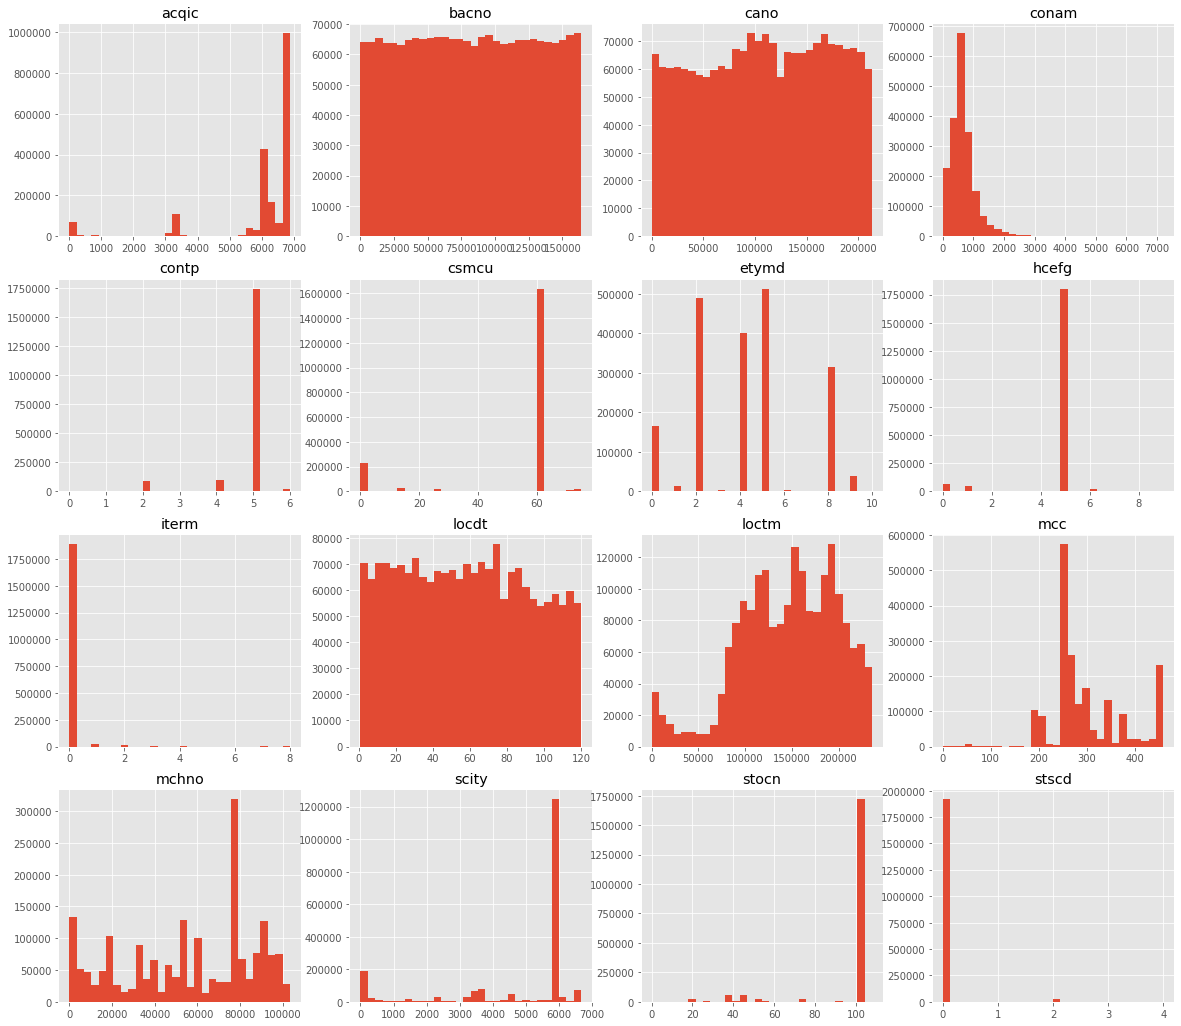

In [8]:
import math
plt.style.use('ggplot')

column = 4
row = math.ceil(len(df_total[number_features].columns)/column)
                
i = 0
fig, axs = plt.subplots(row,column,sharex=True, sharey=True,figsize = (20, 18))
for Columnname in df_total[number_features].columns: 
    i=i+1
    plt.subplot(row, column, i)
    #plt.plot(df_train.loc[:,'mchno'].index,(df_train.loc[:,'mchno'].values).T, 'r', linewidth = 1)
    plt.hist((df_total.loc[:,Columnname].values), bins=30)
    plt.title(Columnname)
plt.show()

In [9]:
#處理數值型偏態參數
from scipy import stats
from scipy.stats import norm, skew

skewed_feats = df_total[number_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

print(skewness)
'''
plt.style.use('ggplot')
for Columnname in skewness[np.abs(skewness['Skew'])>3].index.to_list(): 
    fig, axs = plt.subplots(1,1,sharex=True, sharey=True,figsize = (18, 5))
    plt.subplot(1, 1, 1)
    #plt.plot(df_train.loc[:,'mchno'].index,(df_train.loc[:,'mchno'].values).T, 'r', linewidth = 1)
    plt.hist((df_total.loc[1:3000,Columnname].values), bins=30)
    plt.title(Columnname)
    plt.show()
'''



Skew in numerical features: 

            Skew
iterm  11.677684
stscd   8.888705
conam   1.635535
mcc     0.704613
etymd   0.210764
locdt   0.065060
bacno   0.000400
cano   -0.066977
mchno  -0.372392
loctm  -0.545063
scity  -1.548662
csmcu  -2.098360
acqic  -2.792135
stocn  -2.832411
hcefg  -3.489839
contp  -3.603726


"\nplt.style.use('ggplot')\nfor Columnname in skewness[np.abs(skewness['Skew'])>3].index.to_list(): \n    fig, axs = plt.subplots(1,1,sharex=True, sharey=True,figsize = (18, 5))\n    plt.subplot(1, 1, 1)\n    #plt.plot(df_train.loc[:,'mchno'].index,(df_train.loc[:,'mchno'].values).T, 'r', linewidth = 1)\n    plt.hist((df_total.loc[1:3000,Columnname].values), bins=30)\n    plt.title(Columnname)\n    plt.show()\n"

In [10]:
#數值型態標準化
from sklearn.preprocessing import scale,StandardScaler

for Columnname in number_features:
    
    #在进行标准化时，若数据只有一列，则需要转成列向量，否则会报错。
    scaler = StandardScaler()
    data = (df_total[Columnname].values).reshape(-1, 1)
    scaler.fit(data)
    scaler.scale_ 
    df_total[Columnname] = scaler.transform(data)

In [11]:
#處理非數值型編碼
from sklearn.preprocessing import LabelEncoder

#資料整理
#date = pd.to_datetime(df_climate["Date"], format ='%Y%m%d ') ## 時間欄位整理
for Columnname in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(df_total[Columnname].values)) 
    df_total[Columnname] = lbl.transform(list(df_total[Columnname].values))
    
    


In [12]:
df_train = df_total.iloc[:1521787,:]
df_test = df_total.iloc[1521787:,:]

print('Train:{} ,test:{}'.format(df_train.shape[0],df_test.shape[0]))

#from sklearn.model_selection import train_test_split

#X_train, X_valid, y_train, y_valid = train_test_split(df_train, df_train_y, test_size=0.2, random_state= 12, stratify=df_train_y)


Train:1521787 ,test:421665


### 開始訓練

In [13]:
from sklearn.externals import joblib #jbolib模块
def savemodel(model,name,path):
    joblib.dump(model, path+'/'+name+'.pkl')

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn import metrics
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy import stats
import time


import warnings

warnings.simplefilter('ignore')

dic_classifiers = {}
dic_tuned_parameters = {}

model_MLPClassifier = MLPClassifier(max_iter=100,early_stopping=True)
dic_classifiers['model_MLPClassifier'] = model_MLPClassifier
dic_tuned_parameters['model_MLPClassifier']={
'hidden_layer_sizes': [(np.random.randint(80, 200),np.random.randint(200, 400),np.random.randint(80, 200))],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
'''
#KNN
model_KNeighborsClassifier = KNeighborsClassifier()
dic_tuned_parameters['model_KNeighborsClassifier'] ={} #'n_neighbors': range(2,7),'leaf_size':range(9,100,3),'p':range(1,5)}
dic_classifiers['model_KNeighborsClassifier'] = model_KNeighborsClassifier


#RandomForest
model_RandomForestClassifier = RandomForestClassifier()
dic_classifiers['model_RandomForestClassifier'] = model_RandomForestClassifier
dic_tuned_parameters['model_RandomForestClassifier'] ={}
temp = {"max_depth": range(3,100),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#sp_randint

#XGBoost
model_XGBClassifier = XGBClassifier()
dic_classifiers['model_XGBClassifier'] = model_XGBClassifier
dic_tuned_parameters['model_XGBClassifier'] = {}
temp = {'n_estimators': stats.randint(150, 200),
              'learning_rate': stats.uniform(0.01, 0.6), }





# light XGBoost
model_LGBMClassifier = LGBMClassifier()
dic_classifiers['model_LGBMClassifier'] = model_LGBMClassifier
dic_tuned_parameters['model_LGBMClassifier']={}
temp = {'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}




model_CatBoostClassifier = CatBoostClassifier(verbose=0)
dic_classifiers['model_CatBoostClassifier'] = model_CatBoostClassifier

dic_tuned_parameters['model_CatBoostClassifier'] = {}
temp = {'depth': sp_randint(4, 10),
                  'learning_rate' : sp_uniform(),
                  'iterations'    : sp_randint(10, 100)
                 }

model_SVC = SVC();
dic_classifiers['model_SVC'] = model_SVC
dic_tuned_parameters['model_SVC']={'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

model_GaussianNB = GaussianNB()
dic_classifiers['model_GaussianNB'] = model_GaussianNB
dic_tuned_parameters['model_GaussianNB']={}
#'priors':[None,None], 'var_smoothing':[1e-09,1e-09]

model_DecisionTreeClassifier = DecisionTreeClassifier()
dic_classifiers['model_DecisionTreeClassifier'] = model_DecisionTreeClassifier
dic_tuned_parameters['model_DecisionTreeClassifier'] = {}
temp = {
             "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

model_GradientBoostingClassifier = GradientBoostingClassifier()
dic_classifiers['model_GradientBoostingClassifier'] = model_GradientBoostingClassifier
dic_tuned_parameters['model_GradientBoostingClassifier'] = {}
temp = {
    "loss": ["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth": range(3, 100),
    "max_features": ["log2", "sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample": [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": range(3, 100)
}

model_ExtraTreesClassifier = ExtraTreesClassifier();
dic_classifiers['model_ExtraTreesClassifier'] = model_ExtraTreesClassifier
dic_tuned_parameters['model_ExtraTreesClassifier'] = {}

'''

lr = LogisticRegression()

df_result = pd.DataFrame(columns=['classifiers', 'Accuracy'])
for label, clf in dic_classifiers.items():
    tStart = time.time()#計時開始
    cb_model = RandomizedSearchCV( clf, dic_tuned_parameters[label],scoring='f1', cv=3, n_iter=30, n_jobs=-1)
    %time cb_model.fit(df_train, df_train_y)

    #cb_model.best_params_, cb_model.best_score_, cb_model.best_estimator_
    #df_result.set_value(len(df_result), label, scores.mean())
    #print("Accuracy: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))
    
    tEnd = time.time()#計時結束
    #scores = model_selection.cross_val_score(clf,df_train_x, df_train_y,cv = 5,scoring='accuracy')
    savemodel(cb_model,label,'model')
    print("[%s] F1-score: [%0.2f]  [%s] [{%s}]".format, (label,cb_model.best_score_, cb_model.best_params_,int(tEnd - tStart)))
    dic_classifiers[label]= cb_model.best_estimator_;
    #new=pd.DataFrame({'classifiers':label, 'Accuracy':cb_model.best_score_},index = [0])
    df_result = df_result.append({'regression':label, 'F1-score':cb_model.best_score_,'cost time':str(int(tEnd - tStart))+'sec','condition':cb_model.best_params_}, ignore_index=True)
    

# print(df_result['Accuracy'].sort_values(ascending=False).head(3))


In [ ]:
df_train.astype()

In [16]:
import sklearn
#automl = joblib.load('model/Autosklean.pkl')
predictions = cb_model.predict(df_test)
predictions = (predictions>0.5).astype(int).flatten()

df_op = pd.DataFrame({'txkey':df_test.index, 'fraud_ind': predictions})
df_op.to_csv('sampleSubmission_Keras_softmax.csv',index=False)
print("Model Accuracy score", sklearn.metrics.accuracy_score(cb_model.predict(df_train), df_train_y))

Model Accuracy score 0.9900945401688935


In [18]:
predictions.sum()

2366